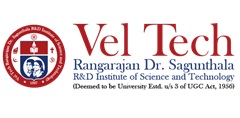

 <h1><center>1152EC259 - FUNDAMENTALS OF MACHINE LEARNING

## Activity 1- Data Wrangling with Pandas on Small Dataset

# Introduction to Pandas

Pandas is a Python library used for working with data sets.

It has functions for analyzing, cleaning, exploring, and manipulating data.

The name "Pandas" has a reference to both "Panel Data", and "Python Data Analysis" and was created by Wes McKinney in 2008.


# Introduction to NumPy

NumPy is a Python library used for working with arrays.

It also has functions for working in domain of linear algebra, fourier transform, and matrices.

NumPy was created in 2005 by Travis Oliphant. It is an open source project and you can use it freely.

NumPy stands for Numerical Python.


## Library Highlights

- A fast and efficient DataFrame object for data manipulation with integrated indexing;

- Tools for reading and writing data between in-memory data structures and different formats: CSV and text files, Microsoft Excel, SQL databases, and the fast HDF5 format;

- Intelligent data alignment and integrated handling of missing data: gain automatic label-based alignment in computations and easily manipulate messy data into an orderly form;

- Flexible reshaping and pivoting of data sets;

- Intelligent label-based slicing, fancy indexing, and subsetting of large data sets;

- Columns can be inserted and deleted from data structures for size mutability;

- Aggregating or transforming data with a powerful group by engine allowing split-apply-combine operations on data sets;

- High performance merging and joining of data sets;

- Hierarchical axis indexing provides an intuitive way of working with high-dimensional data in a lower-dimensional data structure;

- Time series-functionality: date range generation and frequency conversion, moving window statistics, date shifting and lagging. Even create domain-specific time offsets and join time series without losing data;

- Highly optimized for performance, with critical code paths written in Cython or C.

- Python with pandas is in use in a wide variety of academic and commercial domains, including Finance, Neuroscience, Economics, Statistics, Advertising, Web Analytics, and more.

##### Let Begine our Machine Learning Journey with Pandas and NumPy


In [2]:
import pandas as pd
import numpy as np

In [3]:
Data=pd.read_csv(r'client.csv',sep=';')

In [5]:
Data.head(100)

,client_id,birth_number,district_id
0,1,706213,18
1,2,450204,1
2,3,406009,1
3,4,561201,5
4,5,605703,5
...,...,...,...
95,101,430123,68
96,102,585910,74
97,103,550711,74
98,105,800526,31


In [6]:
Data.tail(10)

,client_id,birth_number,district_id
5359,13915,741123,77
5360,13921,706220,62
5361,13923,795222,7
5362,13924,525909,54
5363,13931,420101,8
5364,13955,456030,1
5365,13956,430406,1
5366,13968,680413,61
5367,13971,626019,67
5368,13998,535812,74


In [7]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5369 entries, 0 to 5368
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   client_id     5369 non-null   int64
 1   birth_number  5369 non-null   int64
 2   district_id   5369 non-null   int64
dtypes: int64(3)
memory usage: 126.0 KB


In [8]:
Data.columns

Index(['client_id', 'birth_number', 'district_id'], dtype='object')

In [9]:
Data.shape

(5369, 3)

In [55]:
Data.dtypes

client_id       int64
birth_number    int64
district_id     int64
dtype: object

In [10]:
Data.set_index('birth_number').head()

,client_id,district_id
birth_number,,
706213,1,18
450204,2,1
406009,3,1
561201,4,5
605703,5,5


In [57]:
Data['New_Client_ID']=Data['client_id']+1000
Data.head()

,client_id,birth_number,district_id,New_Client_ID
0,1,706213,18,1001
1,2,450204,1,1002
2,3,406009,1,1003
3,4,561201,5,1004
4,5,605703,5,1005


In [58]:
Data=Data.drop('client_id',axis=1)
Data.head()

,birth_number,district_id,New_Client_ID
0,706213,18,1001
1,450204,1,1002
2,406009,1,1003
3,561201,5,1004
4,605703,5,1005


In [59]:
Data.drop([1,3],axis=0).head()

,birth_number,district_id,New_Client_ID
0,706213,18,1001
2,406009,1,1003
4,605703,5,1005
5,190922,12,1006
6,290125,15,1007


In [64]:
Data['district_id'].drop(3,axis=0).head()

0    18
1     1
2     1
4     5
5    12
Name: district_id, dtype: int64

In [65]:
Data['district_id']=Data['district_id'].drop([1,9,5,7,8])
Data.head(10)

,birth_number,district_id,New_Client_ID
0,706213,18.0,1001
1,450204,NaN,1002
2,406009,1.0,1003
3,561201,5.0,1004
4,605703,5.0,1005
5,190922,NaN,1006
6,290125,15.0,1007
7,385221,NaN,1008
8,351016,NaN,1009
9,430501,NaN,1010


In [66]:
Data.isnull().head()

,birth_number,district_id,New_Client_ID
0,False,False,False
1,False,True,False
2,False,False,False
3,False,False,False
4,False,False,False


In [67]:
Data.isnull().sum()

birth_number     0
district_id      5
New_Client_ID    0
dtype: int64

In [68]:
Data['New_Client_ID'].replace({1001:10010,1002:10020}).head()

0    10010
1    10020
2     1003
3     1004
4     1005
Name: New_Client_ID, dtype: int64

In [69]:
Data['birth_number']=Data['birth_number'].astype(str)
print(Data.dtypes)
Data['birth_number'].head()

birth_number      object
district_id      float64
New_Client_ID      int64
dtype: object


0    706213
1    450204
2    406009
3    561201
4    605703
Name: birth_number, dtype: object

In [71]:
Data['birth_number'].str[2:4]

0       62
1       02
2       60
3       12
4       57
        ..
5364    60
5365    04
5366    04
5367    60
5368    58
Name: birth_number, Length: 5369, dtype: object

### The column birth_number has date format of DDMMYY but the columns has Gender embedded into the Date format Male: DDMMYY female: DDMM+50YY 

In [74]:
Months=Data['birth_number'].str[2:4]
Months.head()

0    62
1    02
2    60
3    12
4    57
Name: birth_number, dtype: object

In [75]:
def Gender_teller(x):
    if int(x)>12:
        gender='Female'
    else:
        gender='Male'
    return gender

In [76]:
Months.apply(Gender_teller)

0       Female
1         Male
2       Female
3         Male
4       Female
         ...  
5364    Female
5365      Male
5366      Male
5367    Female
5368    Female
Name: birth_number, Length: 5369, dtype: object

In [77]:
Data['Gender']=Months.apply(Gender_teller)
Data.head()

,birth_number,district_id,New_Client_ID,Gender
0,706213,18.0,1001,Female
1,450204,NaN,1002,Male
2,406009,1.0,1003,Female
3,561201,5.0,1004,Male
4,605703,5.0,1005,Female


In [78]:
Data['Gender'].value_counts(normalize=True)

Male      0.507357
Female    0.492643
Name: Gender, dtype: float64